## Plotting wave files

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

In [3]:
# Only opens 16bit PCM WAV files.
# The format can be changed in Audacity.
spf = wave.open('test2.wav','r')

In [4]:
# Only opens Mono files
if spf.getnchannels() == 2:
    print 'Just mono files'
    sys.exit(0)

In [5]:
# Extracts the signal
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
print(signal)
len(signal)

[  296   297   294 ..., -1120  -559  -411]


130603

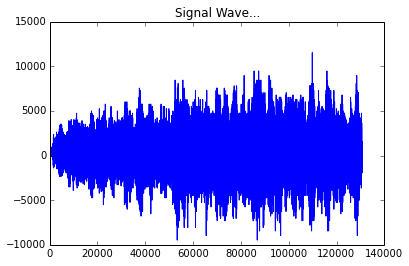

In [6]:
# Prints the signal
plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)

## Fast Fourier Transform

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


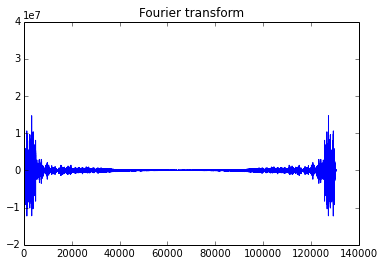

In [7]:
Y = np.fft.fft(signal)
plt.figure(2)
plt.title('Fourier transform')
plt.plot(Y)

In [8]:
Y

array([  3.79386760e+07    +0.j        ,  -1.11978943e+04-25406.69537752j,
        -1.67714729e+04 +5782.91817767j, ...,
        -1.09229381e+04+21810.02214398j,  -1.67714729e+04 -5782.91817766j,
        -1.11978943e+04+25406.69537752j])

## Writing the Fast Fourier Transform in Latex

In [14]:
lfile = open("latex.tex","w")
N = str(len(Y))

lfile.write("\\documentclass{scrartcl}\n\\usepackage{amsmath}\n\\begin{document}\n")
lfile.write("\\allowdisplaybreaks[1]\n")
lfile.write("\\title{Hungarian March}\n\\subtitle{First 8 seconds!}\n")


# Huge files cause a memory error in pdflatex
# We split in small files

j = 0
ffile = open("latex"+str(0)+".tex","w")
ffile.write("\\begin{align*}\n")
for k in range(len(Y)):
    j = j+1
    if j==28:
        j=0
        ffile.write("\\end{align*}\n")
        lfile.write("\\input{latex"+str((k-1)/28)+".tex}\n")
        ffile.close()
        ffile = open("latex"+str(k/28)+".tex","w")
        ffile.write("\\begin{align*}\n")
    ffile.write(str(Y[k]) + "e^{ \\frac{j \\tau}{" + N +  "} " + str(k) +  "t } && + \\\\ \n")
ffile.write("\\end{align*}\n")

lfile.write("\\end{document}")
lfile.close()

## Inverse Fast Fourier Transform

In [21]:
# Inverses the fast fourier transform
yinv = np.fft.ifft(Y)
newsignal = yinv.real.astype(np.int16)
newsignal = newsignal.copy(order='C')

## Numeric signal to wave file

In [22]:
# Recreates the wave file
spfw = wave.open('test3.wav','w')
spfw.setnchannels(spf.getnchannels())
spfw.setsampwidth(spf.getsampwidth())
spfw.setframerate(spf.getframerate())
spfw.writeframes(newsignal)